# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

With a Car's dataset given, the business goal is to understand the attributes that impact sales price of used cars and be able to predict the car prices. From the data standpoint, The objective is 
  1. Identity the top features that influence the car price
  2. Build a predictive model with those features.
We will use various data cleansing and machine learning techniques to identify the same.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [48]:
# Core Libraries
import pandas as pd
import numpy as np

# Plot libraries
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#set the plot size to 14" x 4"
plt.rcParams['figure.figsize'] = (18,5)

In [49]:
# Let's load the data
df = pd.read_csv('data/vehicles.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [51]:
df.sample(10).head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
374959,7316294354,houston,39500,2013.0,ford,f750,excellent,6 cylinders,diesel,99332.0,clean,automatic,3FRNF7FA2DV035135,rwd,NaN,truck,white,tx
134293,7305725312,east idaho,37199,2017.0,ford,expedition,NaN,6 cylinders,gas,30680.0,clean,automatic,1FMJU1KT8HEA78283,rwd,NaN,SUV,white,id
185685,7316757959,boston,8995,2012.0,hyundai,tuscon limited 4x4,excellent,4 cylinders,gas,143504.0,clean,automatic,KM8JUCAC3CU417267,4wd,full-size,SUV,green,ma
348714,7304152483,greenville / upstate,0,2016.0,hyundai,accent,NaN,4 cylinders,gas,125103.0,clean,automatic,KMHCT4AE9GU033132,fwd,NaN,sedan,NaN,sc
18678,7306379359,fort smith,14937,2015.0,nissan,rogue sl,good,NaN,other,93736.0,clean,automatic,5N1AT2MV1FC833869,NaN,NaN,other,white,ar


In [52]:
# Check for missing values

missing_values = (df.isna().mean() * 100).reset_index().rename(columns={"index": "Features", 0: "Missing %"})
missing_values["Missing %"] = round(missing_values["Missing %"])

missing_values

,Features,Missing %
0,id,0.0
1,region,0.0
2,price,0.0
3,year,0.0
4,manufacturer,4.0
5,model,1.0
6,condition,41.0
7,cylinders,42.0
8,fuel,1.0
9,odometer,1.0


In [57]:
# Looking at the sample above, there are columns with nulls.. Check for nulls and remove nulls.
df = df.dropna()
df.set_index("id", inplace=True)
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


,price
count,34868.000000
mean,15837.446771
std,13460.056823
min,0.000000
25%,6500.000000
50%,12000.000000
75%,22003.500000
max,155000.000000


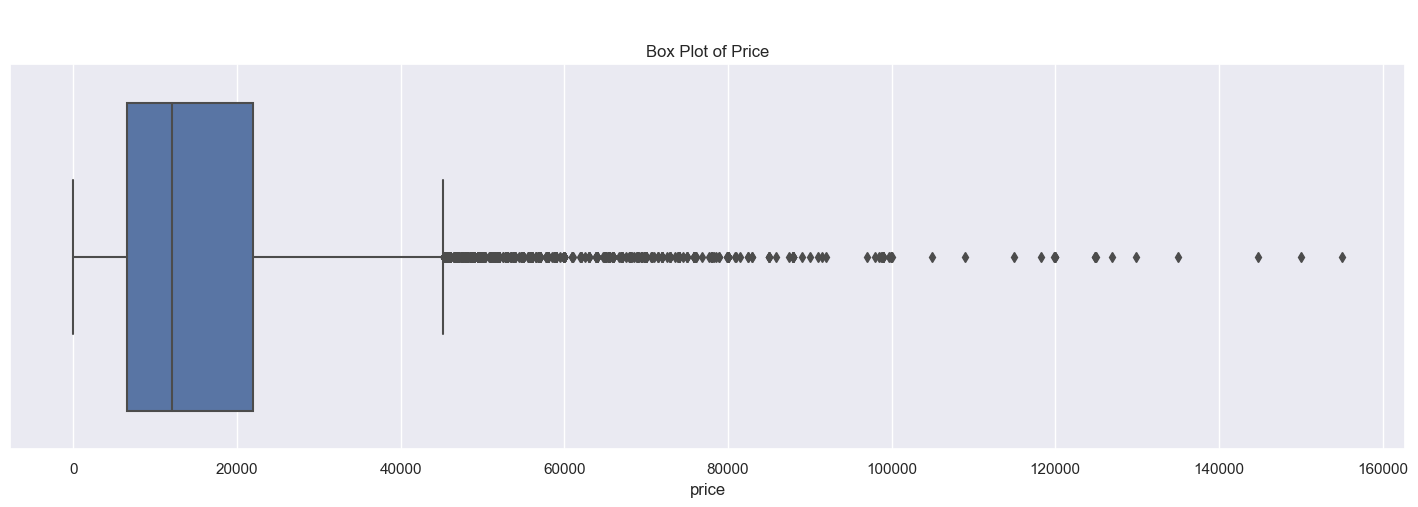

In [58]:
# Check for outliers in numeric columns
sns.boxplot(x=df["price"]);
plt.title("\n\nBox Plot of Price");
df.describe()[["price"]]

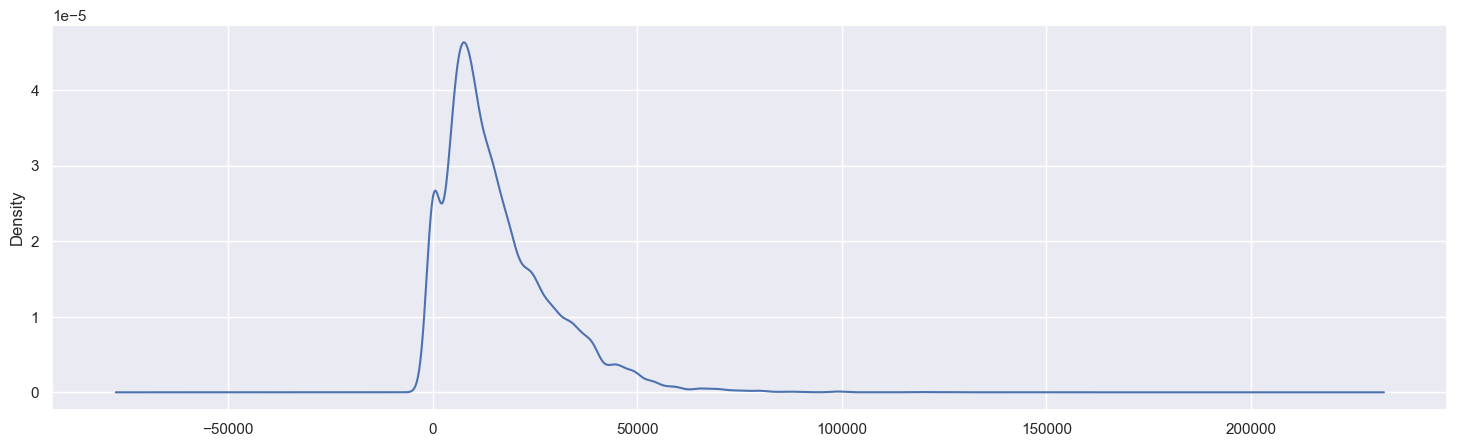

In [59]:
 df["price"].plot(kind="kde");

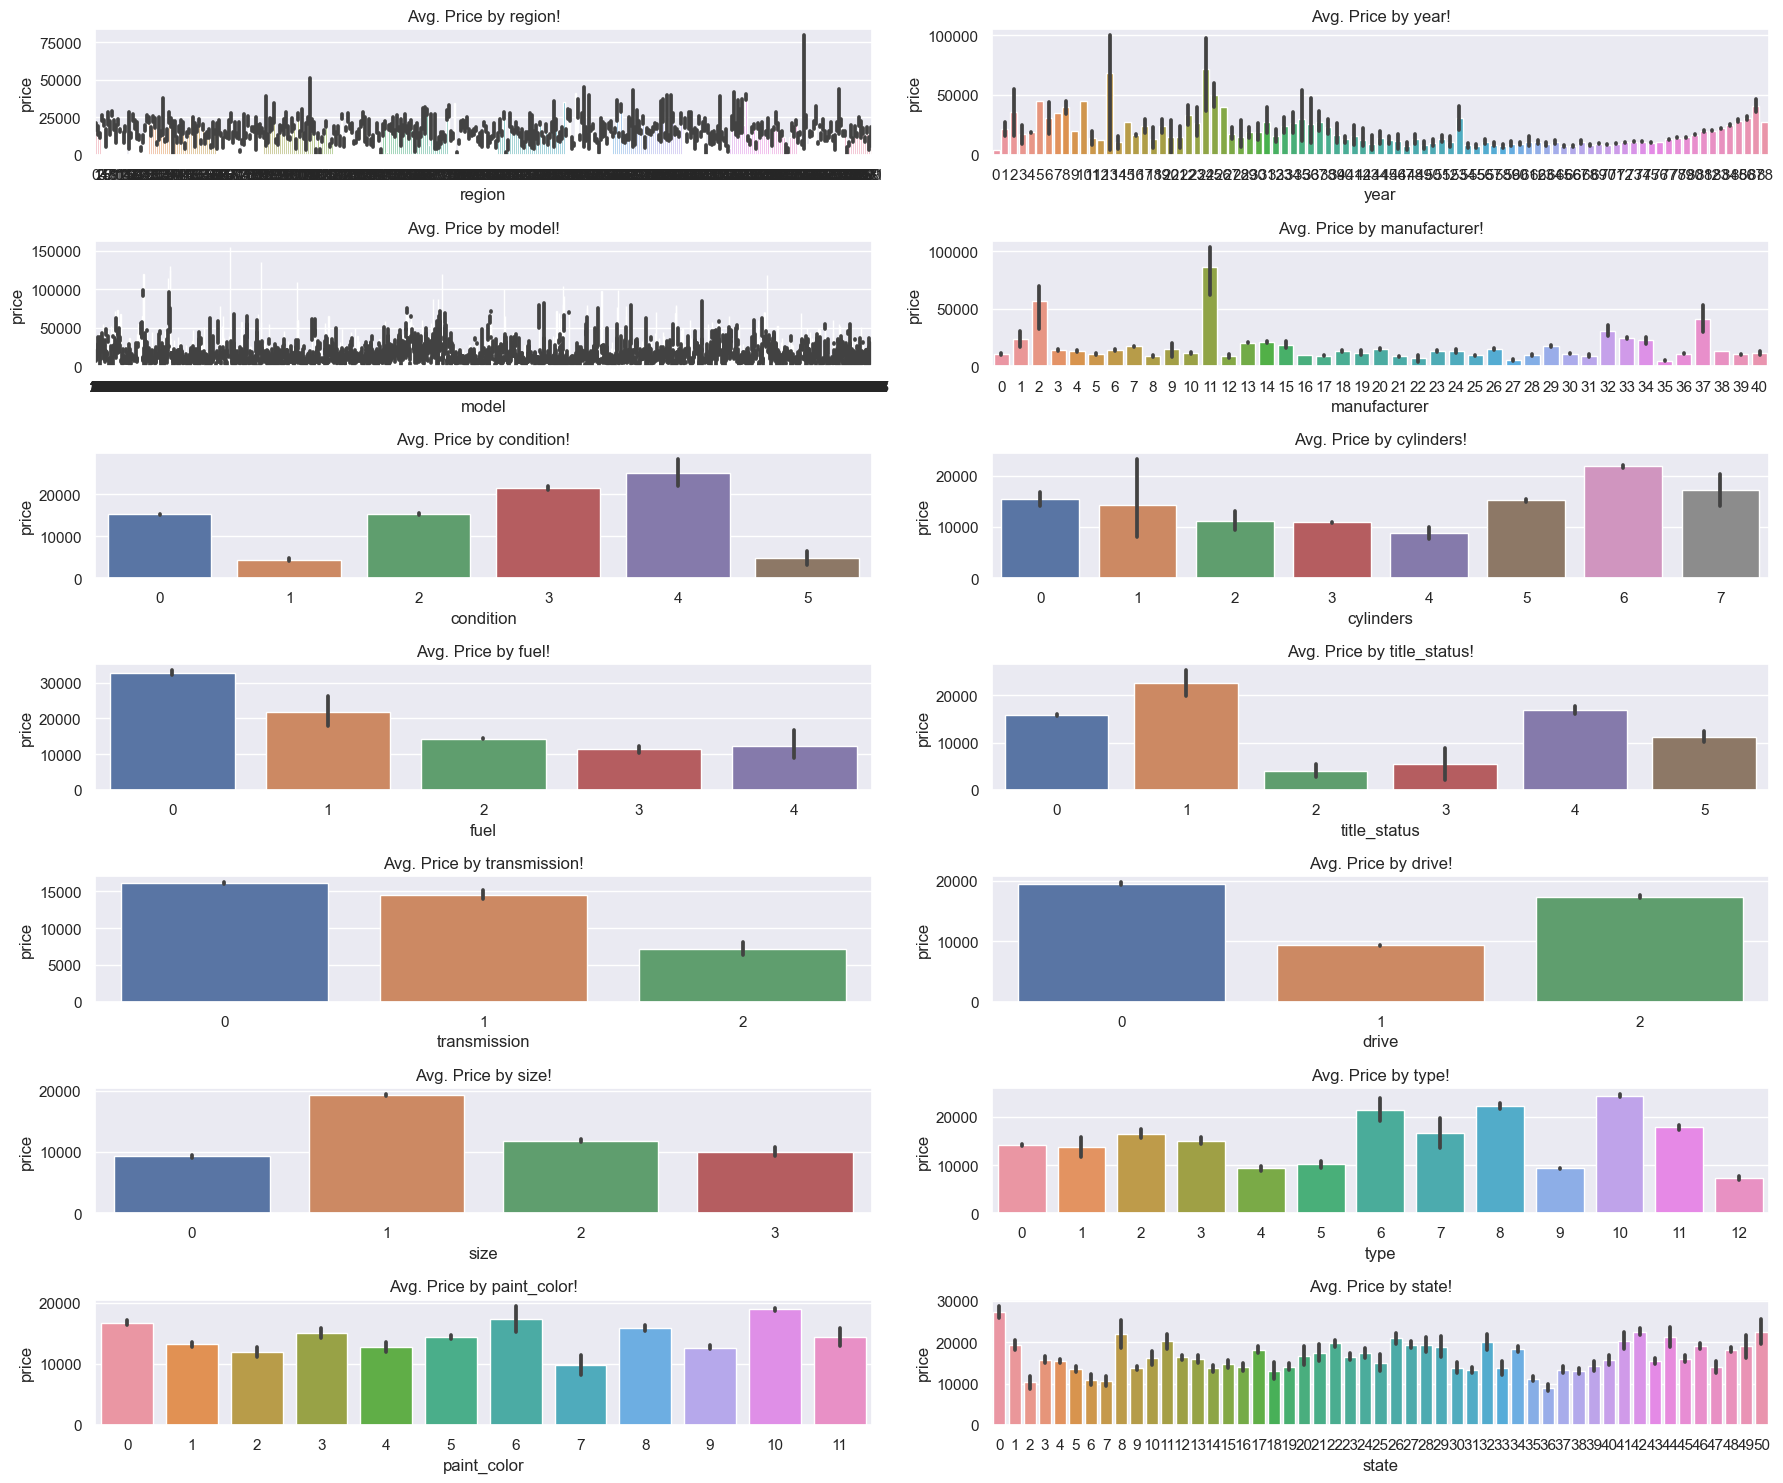

In [72]:
# Let's look at avg price by each category columns:


category_columns = ["region","year", "model",  "manufacturer", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"]
fig, axs = plt.subplots(7, 2, figsize=(18, 15));

row=0
col=0
for index, column in enumerate(category_columns):
    axis = axs[row, col]
    sns.barplot(x=column, y='price', data=df, ax=axis);
    axis.set_title(f'Avg. Price by {category_columns[index]}!')
    col = col+1
    if(col>1): 
        row=row+1
        col=0
fig.tight_layout()
plt.show()

In [65]:
category_columns = ["region","year", "model",  "manufacturer", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"]

# Mark them as category
for column in category_columns:
    df[column]=df[column].astype('category').cat.codes


In [60]:
df['profession']=df['profession'].astype('category').cat.codes
df['media']=df['media'].astype('category').cat.codes
df.corr()

ValueError: could not convert string to float: 'auburn'

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [40]:
df = pd.read_csv('data/vehicles.csv').dropna()
# Set index with id

df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


In [41]:
# Convert cylinders to numeric
df['cylinders'].value_counts()
df['cylinders'] = df['cylinders'].str.replace("cylinders","").str.replace("other", "0").str.strip().astype(int)
df.info()
df['cylinders'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34868 entries, 7305672709 to 7302301268
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        34868 non-null  object 
 1   price         34868 non-null  int64  
 2   year          34868 non-null  float64
 3   manufacturer  34868 non-null  object 
 4   model         34868 non-null  object 
 5   condition     34868 non-null  object 
 6   cylinders     34868 non-null  int64  
 7   fuel          34868 non-null  object 
 8   odometer      34868 non-null  float64
 9   title_status  34868 non-null  object 
 10  transmission  34868 non-null  object 
 11  VIN           34868 non-null  object 
 12  drive         34868 non-null  object 
 13  size          34868 non-null  object 
 14  type          34868 non-null  object 
 15  paint_color   34868 non-null  object 
 16  state         34868 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 4.8+ 

6     11618
4     11302
8     10928
10      565
5       281
0        96
3        67
12       11
Name: cylinders, dtype: int64

In [8]:
# Since we have id, we can remove VIN
df = df.drop(columns=['VIN'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34868 entries, 126 to 426836
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  drive         34868 non-null  object 
 13  size          34868 non-null  object 
 14  type          34868 non-null  object 
 15  paint_color   34868 non-null  object 
 16  state         34868 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 4.8+ MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.